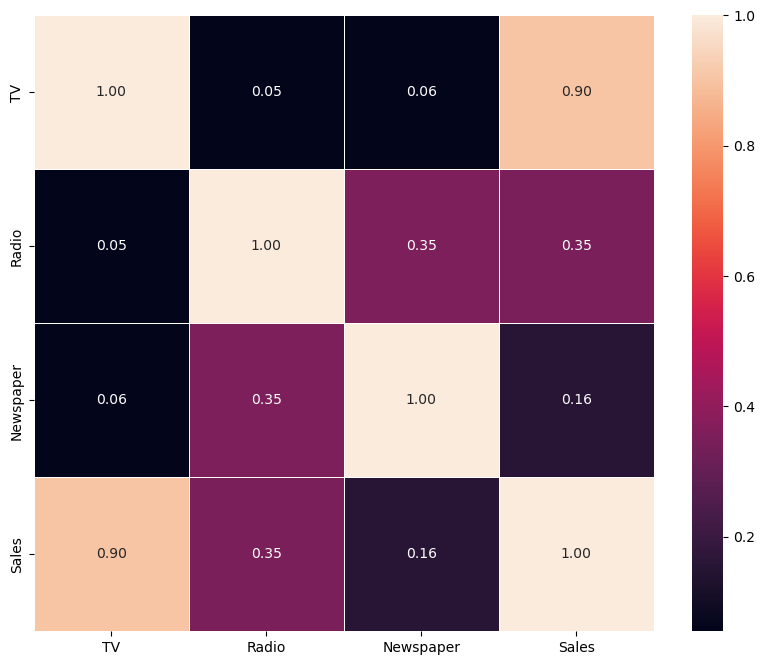

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('advertising.csv')

data_corr = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data_corr, annot=True, fmt=".2f", linewidth=0.5)
plt.show()

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# arr1 = np.array([1, 2, 3])
# arr2 = np.array([4, 8, 12])
# input_arr = np.array([arr1, arr2])

# print(cosine_similarity(input_arr))

vi_data_df = pd.read_csv('vi_text_retrieval.csv')
context = vi_data_df['text']
context = [doc.lower() for doc in context]

tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context)

print(type(context_embedded))
print(context_embedded.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(500, 2913)


In [32]:
vocabs = tfidf_vectorizer.vocabulary_
print(len(vocabs))

2913


In [34]:
print(context_embedded.toarray()[7][0])

0.31126580760710637


In [49]:
question = vi_data_df.iloc[0]['question']
print(question)

context_embedded = tfidf_vectorizer.fit_transform(context)
query_embedded = tfidf_vectorizer.transform([question.lower()])
cosine_scores = cosine_similarity(context_embedded, query_embedded)

print(cosine_scores.shape)
# print(cosine_scores)

results = []

for index in cosine_scores.argsort()[-5:][::-1]:
    doc_score = {
        'id': index,
        'cosine_score': cosine_scores[index]
    }
    results.append(doc_score)

display(results)

Quang Hải giành được chức vô địch U21 quốc gia năm bao nhiêu tuổi
(500, 1)


[{'id': array([0], dtype=int64), 'cosine_score': array([[0.62799105]])},
 {'id': array([0], dtype=int64), 'cosine_score': array([[0.62799105]])},
 {'id': array([0], dtype=int64), 'cosine_score': array([[0.62799105]])},
 {'id': array([0], dtype=int64), 'cosine_score': array([[0.62799105]])},
 {'id': array([0], dtype=int64), 'cosine_score': array([[0.62799105]])}]

In [74]:
def tfidf_search(question, tfidf_vectorizer, top_d=5):
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    cosine_scores = cosine_similarity(context_embedded, query_embedded)

    # Get top k cosine score and its index
    results = []
    for index in cosine_scores.argsort()[-top_d:][::-1]:
        if index < 3:
            print(index)
        else:
            break
        doc_score = {
            'id': index,
            'cosine_score': cosine_scores[index]
        }
        results.append(doc_score)


    return results
question = vi_data_df.iloc[2]['question']
print(question)
results2 = tfidf_search(question, tfidf_vectorizer, top_d=5)
display(results2)



Quân đội Hoa Kỳ gồm những lực lượng nào
[0]
[0]
[0]
[0]
[0]


[{'id': array([0], dtype=int64), 'cosine_score': array([[0.03911269]])},
 {'id': array([0], dtype=int64), 'cosine_score': array([[0.03911269]])},
 {'id': array([0], dtype=int64), 'cosine_score': array([[0.03911269]])},
 {'id': array([0], dtype=int64), 'cosine_score': array([[0.03911269]])},
 {'id': array([0], dtype=int64), 'cosine_score': array([[0.03911269]])}]

In [81]:
l1 = np.array([1, 8, -9, 3])

for i in l1.argsort():
    print(i)
    print("\t", l1[i])

2
	 -9
0
	 1
3
	 3
1
	 8
